## Retail Price Optimization


### Library importation

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

import eli5
from eli5.sklearn import PermutationImportance
import shap

### Overview of dataset

In [4]:
os.chdir("D:\Project")
price_data = pd.read_csv('retail_price.csv')
price_data.dropna()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [5]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [6]:
price_data.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [7]:
price_data.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [8]:
price_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [9]:
price_data.head(5)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [10]:
price_data.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

### Date Feature

In [11]:
price_data['month_year'] = pd.to_datetime(price_data['month_year'])
price_data['month'] = price_data['month_year'].dt.month
price_data['year'] = price_data['month_year'].dt.year

### Calculate and visualize total quantity, price 

In [12]:
print('Total quantity:', price_data['qty'].sum())
print('Total price:', price_data['total_price'].sum())

Total quantity: 9799
Total price: 961751.0999999999


### Check correlation between each factors for insight consideration


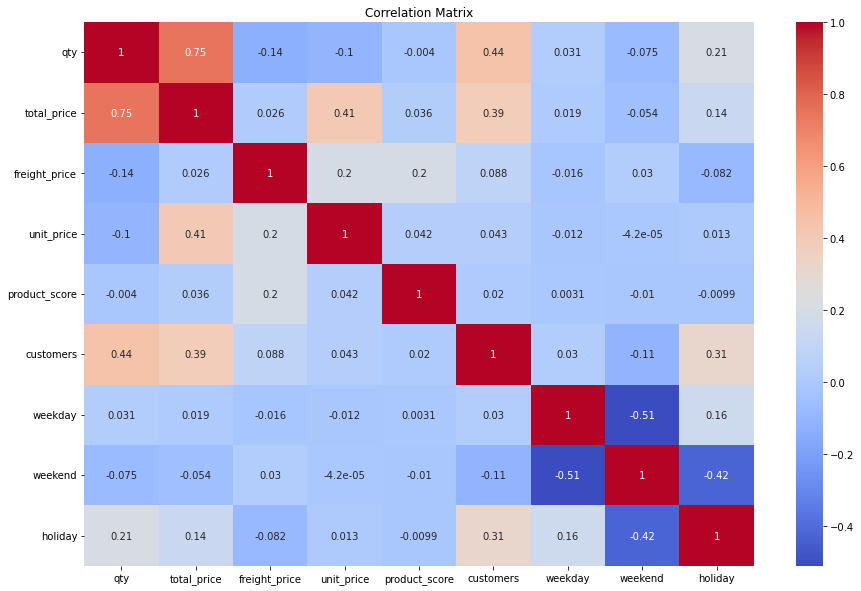

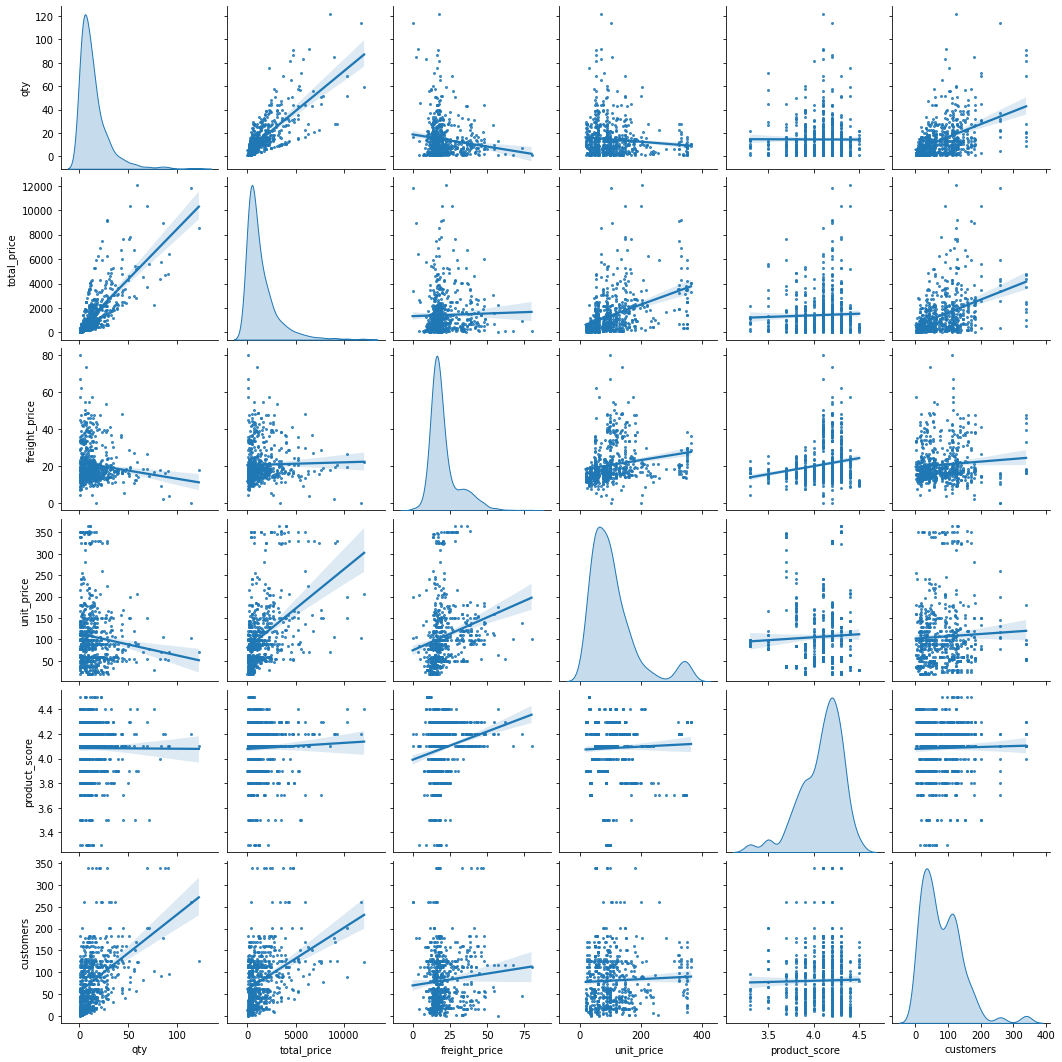

In [13]:
subset = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_score', 'customers', 'weekday', 'weekend', 'holiday']
subset_price_data = price_data[subset]

# Compute correlation matrix
corr_matrix = subset_price_data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(subset_price_data, vars=['qty', 'total_price', 'freight_price', 'unit_price', 'product_score', 'customers'], diag_kind='kde', kind = 'reg',
             plot_kws={'scatter_kws': {'s': 4}})
plt.show()

#### Market Demand Indicators:

In [ ]:
price_data['customer_score_ratio'] = price_data['customers'] / price_data['product_score']
price_data['customer_photo_ratio'] = price_data['customers'] / price_data['product_photos_qty']
price_data['description_length_ratio'] = price_data['product_description_lenght'] / price_data['product_name_lenght']

### Revenue, Profit and Margin

In [14]:
price_data['revenue'] = price_data['qty'] * price_data['total_price']
price_data['profit'] = price_data['revenue'] - price_data['freight_price']
price_data['margin'] = (price_data['profit']/price_data['revenue'])*100

fig = px.scatter(price_data,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

fig = px.histogram(price_data,
                   x='profit',
                   nbins=20,
                   title='Distribution of profit')
fig.show()

### Price Ratio

In [15]:
price_data['price_ratio_1'] = price_data['unit_price'] / price_data['comp_1']
price_data['price_ratio_2'] = price_data['unit_price'] / price_data['comp_2']
price_data['price_ratio_3'] = price_data['unit_price'] / price_data['comp_3']

### Price Differences
#### Comparison with Competitor Products

In [16]:
price_data['price_diff1'] = price_data['unit_price'] - price_data['comp_1']
price_data['price_diff2'] = price_data['unit_price'] - price_data['comp_2']
price_data['price_diff3'] = price_data['unit_price'] - price_data['comp_3']

for i in range(1,4):
    price_diff = f"price_diff{i}"
    fig = px.bar(x=price_data['product_category_name'],
                 y=price_data[price_diff],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()


In [17]:
price_data['fp_diff1'] = price_data['freight_price'] - price_data['fp1']
price_data['fp_diff2'] = price_data['freight_price'] - price_data['fp2']
price_data['fp_diff3'] = price_data['freight_price'] - price_data['fp3']

for i in range(1,4):
    price_diff = f"fp_diff{i}"
    fig = px.bar(x=price_data['product_category_name'],
                 y=price_data[price_diff],
                 title=f"Competitor {i} Freight Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

In [18]:
price_data.head(5).T

,0,1,2,3,4
product_id,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00
qty,1,3,6,4,2
total_price,45.95,137.85,275.7,183.8,91.9
freight_price,15.1,12.933333,14.84,14.2875,15.1
unit_price,45.95,45.95,45.95,45.95,45.95
product_name_lenght,39,39,39,39,39
product_description_lenght,161,161,161,161,161
product_photos_qty,2,2,2,2,2


In [19]:
print(f"Columns: {price_data.shape[1]}\nSamples: {price_data.shape[0]}")

Columns: 42
Samples: 676


### More visuallization of the data
#### Unit Price compared to other factors

In [20]:
corrs = price_data.corr()['unit_price'].sort_values()
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Factors with Unit Price',
             labels={
                 'x': 'Factors',
                 'y': 'Correlation'
             })
fig.show()

In [21]:
fig = px.bar(price_data, x='product_category_name',
             y='unit_price', title='Unit Price by Product Category')
fig.show()

fig = px.box(price_data,
             y='unit_price',
             title='Distribution of Unit Price')
fig.show()

#### 

In [22]:
fig = px.histogram(price_data,
                   x='total_price',
                   nbins=20,
                   title='Distribution of Total Price')
fig.show()

#Total price by each product
fig = px.bar(price_data, x='product_category_name',
             y='total_price', title='Total Price by Product Category')
fig.show()

#### Price compared to other factors

In [23]:

#Total price by weekday
fig = px.box(price_data, x='weekday', 
             y='total_price', 
             title='Box Plot of Total Price by number of Weekdays in a Month')
fig.show()

#Total price by weekday
fig = px.box(price_data, x='weekend', 
             y='total_price', 
             title='Box Plot of Total Price by number of Weekend days in a Month')
fig.show()

### Feture Engineering
####  Preparing the dataset for modeling by selecting and engineering features.

In [27]:
# Creating aggregated dataframe
mean_value = ['product_id', 'month_year', 'price_diff1', 'price_diff2', 'price_diff3',
                'fp_diff1', 'fp_diff2', 'fp_diff3', 'product_score', 'unit_price']
sum_value = ['product_id', 'month_year', 'total_price', 'freight_price', 'customers']

mean_df = price_data[mean_value]
sum_df = price_data[sum_value]

#based on product type
products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum()

# join dataframe
products = pd.concat([products_sum, products_mean],
                     axis=1, join='inner').reset_index()
products.head()

,product_id,total_price,freight_price,customers,price_diff1,price_diff2,price_diff3,fp_diff1,fp_diff2,fp_diff3,product_score,unit_price
0,bed1,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0,42.211989
1,bed2,42938.66,324.204152,968,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9,86.774536
2,bed3,10304.96,172.316049,530,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3,92.101364
3,bed4,6011.77,151.576305,515,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2,46.725444
4,bed5,29997.36,96.015504,385,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4,198.381703


#### Building Model

In [71]:
from sklearn.model_selection import train_test_split

# Prepairing 
X = products.drop(['product_id', 'unit_price'], axis=1)
y = products['unit_price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Setup for Visualization in different model 

In [81]:
# Function for visualization
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.axline((0, 0), slope=1, color="red", linestyle="--")
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.show()

def plot_feature_importance(importance, features, model_name):
    feature_importance = np.array(importance)
    feature_names = np.array(features)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_name + ' feature importance')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature names')
    plt.show()


#### Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")


Linear Regression - MSE: 1123.270999499375, R2: 0.7871243116387432


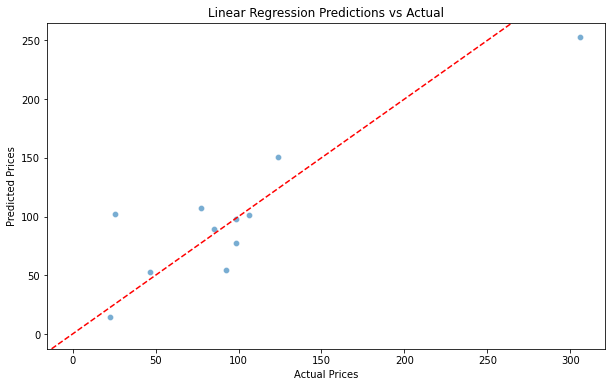

In [111]:
plot_predictions(y_test, y_pred_lr, 'Linear Regression')

#### Random Forest Regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=50, random_state=40)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}")


Random Forest Regressor - MSE: 2016.7294692080163, R2: 0.6178013371773803


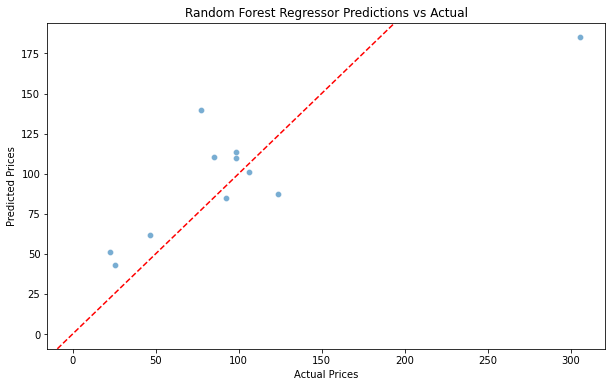

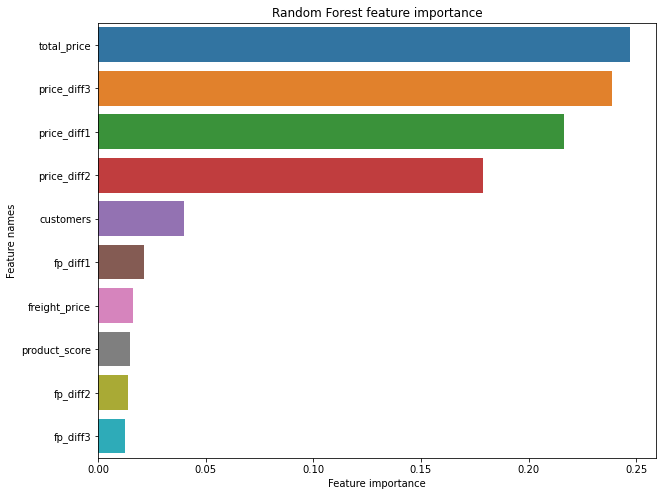

In [119]:
plot_predictions(y_test, y_pred_rf, 'Random Forest Regressor')
plot_feature_importance(model_rf.feature_importances_, X.columns, 'Random Forest')


#### XGBoost

In [124]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 6, 'eta': 0.3, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

y_pred_xgb = bst.predict(dtest)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}")


XGBoost - MSE: 1455.9829323985791, R2: 0.72407071034975


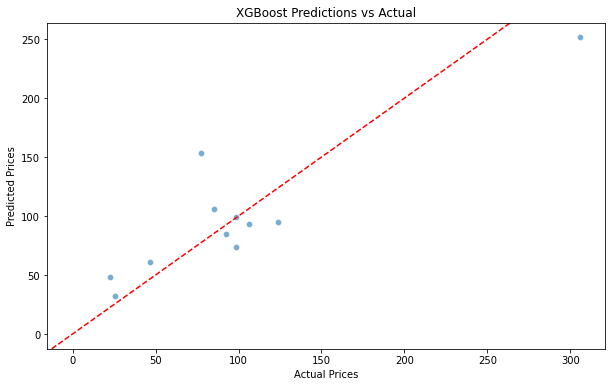

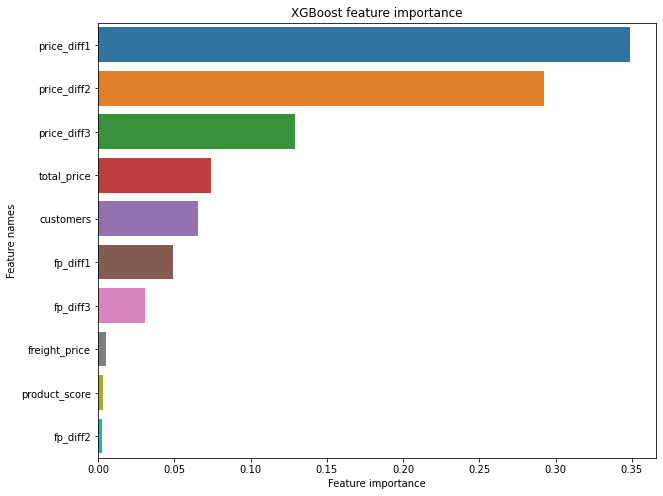

In [125]:
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

plot_predictions(y_test, y_pred_xgb, 'XGBoost')
plot_feature_importance(model_xgb.feature_importances_, X.columns, 'XGBoost')


#### Gradient Boosting Regressor

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gbr.fit(X_train, y_train)

y_pred_gbr = model_gbr.predict(X_test)

# Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor - MSE: {mse_gbr}, R2: {r2_gbr}")


Gradient Boosting Regressor - MSE: 1586.3670440804178, R2: 0.6993610832535171


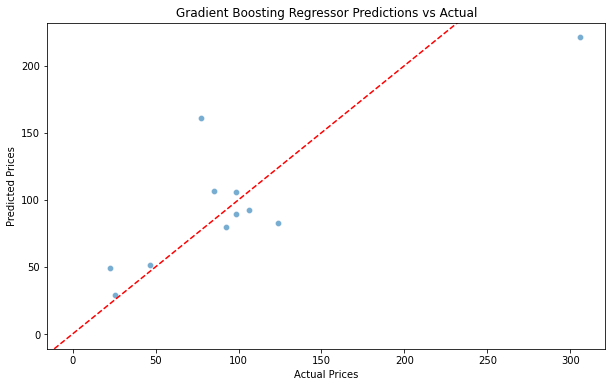

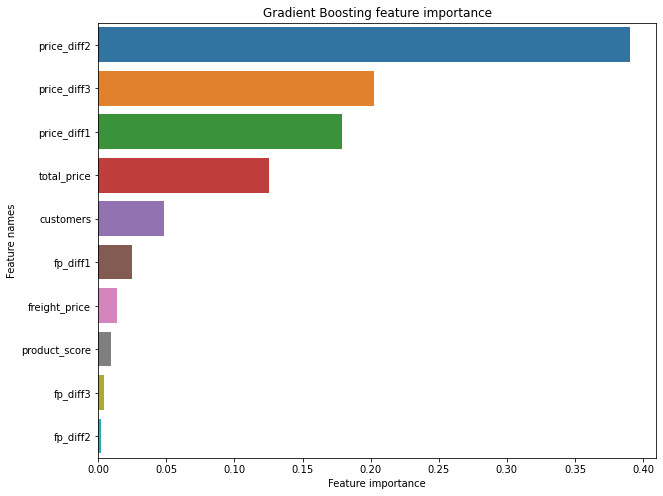

In [130]:
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

plot_predictions(y_test, y_pred_gbr, 'Gradient Boosting Regressor')
plot_feature_importance(model_gbr.feature_importances_, X.columns, 'Gradient Boosting')


#### SHAP model

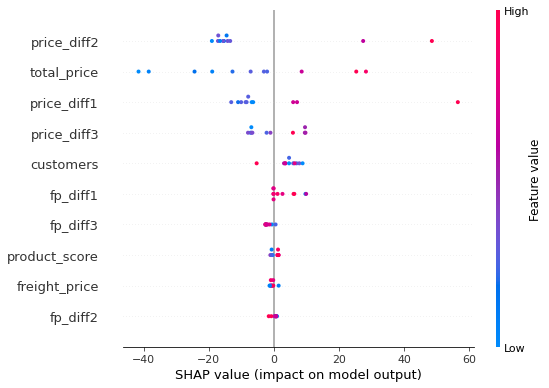

In [156]:
import shap

# Calculate SHAP values
explainer = shap.Explainer(model_xgb, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [159]:

shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values.values[0,:], X_test.iloc[0,:])

# Display the force plot
force_plot


#### Cleaned insight dataset

In [ ]:
price_data.to_csv('cleaned_retail_price.csv', index=True)